# View Crime data

Some basic visulisations of the MPS crime data

In [83]:
import pandas as pd
import seaborn as sns
from calendar import monthrange

%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [48]:
df = pd.read_pickle("mps.borough.crime.2010-2021.pickle")
df

index                    MajorText  \
0       37128    Arson and Criminal Damage   
1       37129    Arson and Criminal Damage   
2       37130                     Burglary   
3       37131                     Burglary   
4       37132                Drug Offences   
...       ...                          ...   
243403  37123             Vehicle Offences   
243404  37124             Vehicle Offences   
243405  37125  Violence Against the Person   
243406  37126  Violence Against the Person   
243407  37127  Violence Against the Person   

                                 MinorText    LookUp_BoroughName yearmonth  \
0                                    Arson  Barking and Dagenham    201004   
1                          Criminal Damage  Barking and Dagenham    201004   
2          Burglary Business and Community  Barking and Dagenham    201004   
3                        Domestic Burglary  Barking and Dagenham    201004   
4                         Drug Trafficking  Barking and Dagenham    201004   
...                                    ...                   ...       ...   
243403          Theft from a Motor Vehicle           Westminster    202203   
243404  Theft or Taking of a Motor Vehicle           Westminster    202203   
243405                            Homicide           Westminster    202203   
243406                Violence with Injury           Westminster    202203   
243407             Violence without Injury           Westminster    202203   

        value        date  
0           6  2010-04-01  
1         208  2010-04-01  
2          49  2010-04-01  
3         118  2010-04-01  
4           9  2010-04-01  
...       ...         ...  
243403    290  2022-03-01  
243404     51  2022-03-01  
243405      0  2022-03-01  
243406    347  2022-03-01  
243407    659  2022-03-01  

[243408 rows x 7 columns]

In [86]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df['dayinmonth'] = list(map(lambda x: monthrange(x.year, x.month)[1], df.date))
df['crime/day'] = df['value'] / df['dayinmonth']

In [87]:
df

index                    MajorText  \
0       37128    Arson and Criminal Damage   
1       37129    Arson and Criminal Damage   
2       37130                     Burglary   
3       37131                     Burglary   
4       37132                Drug Offences   
...       ...                          ...   
243403  37123             Vehicle Offences   
243404  37124             Vehicle Offences   
243405  37125  Violence Against the Person   
243406  37126  Violence Against the Person   
243407  37127  Violence Against the Person   

                                 MinorText    LookUp_BoroughName yearmonth  \
0                                    Arson  Barking and Dagenham    201004   
1                          Criminal Damage  Barking and Dagenham    201004   
2          Burglary Business and Community  Barking and Dagenham    201004   
3                        Domestic Burglary  Barking and Dagenham    201004   
4                         Drug Trafficking  Barking and Dagenham    201004   
...                                    ...                   ...       ...   
243403          Theft from a Motor Vehicle           Westminster    202203   
243404  Theft or Taking of a Motor Vehicle           Westminster    202203   
243405                            Homicide           Westminster    202203   
243406                Violence with Injury           Westminster    202203   
243407             Violence without Injury           Westminster    202203   

        value        date  month  year  dayinmonth  crime/day  
0           6  2010-04-01      4  2010          30   0.200000  
1         208  2010-04-01      4  2010          30   6.933333  
2          49  2010-04-01      4  2010          30   1.633333  
3         118  2010-04-01      4  2010          30   3.933333  
4           9  2010-04-01      4  2010          30   0.300000  
...       ...         ...    ...   ...         ...        ...  
243403    290  2022-03-01      3  2022          31   9.354839  
243404     51  2022-03-01      3  2022          31   1.645161  
243405      0  2022-03-01      3  2022          31   0.000000  
243406    347  2022-03-01      3  2022          31  11.193548  
243407    659  2022-03-01      3  2022          31  21.258065  

[243408 rows x 11 columns]

Aggregate (sum) Public Order Offences by borough, month and year

In [88]:
sdf = df.groupby(['MajorText', 'LookUp_BoroughName', 'year', 'month']).sum().reset_index()
sdf

MajorText    LookUp_BoroughName  year  month   index  \
0        Arson and Criminal Damage  Barking and Dagenham  2010      4   74257   
1        Arson and Criminal Damage  Barking and Dagenham  2010      5   77695   
2        Arson and Criminal Damage  Barking and Dagenham  2010      6   81133   
3        Arson and Criminal Damage  Barking and Dagenham  2010      7   84571   
4        Arson and Criminal Damage  Barking and Dagenham  2010      8   88009   
...                            ...                   ...   ...    ...     ...   
56227  Violence Against the Person           Westminster  2021     11   92814   
56228  Violence Against the Person           Westminster  2021     12   97455   
56229  Violence Against the Person           Westminster  2022      1  102096   
56230  Violence Against the Person           Westminster  2022      2  106737   
56231  Violence Against the Person           Westminster  2022      3  111378   

       value  dayinmonth  crime/day  
0        214          60   7.133333  
1        198          62   6.387097  
2        238          60   7.933333  
3        230          62   7.419355  
4        210          62   6.774194  
...      ...         ...        ...  
56227   1008          90  33.600000  
56228   1024          93  33.032258  
56229    929          93  29.967742  
56230    887          84  31.678571  
56231   1006          93  32.451613  

[56232 rows x 8 columns]

In [89]:
sdf[sdf.MajorText == 'Public Order Offences']

MajorText    LookUp_BoroughName  year  month   index  \
27720  Public Order Offences  Barking and Dagenham  2010      4  148650   
27721  Public Order Offences  Barking and Dagenham  2010      5  155526   
27722  Public Order Offences  Barking and Dagenham  2010      6  162402   
27723  Public Order Offences  Barking and Dagenham  2010      7  169278   
27724  Public Order Offences  Barking and Dagenham  2010      8  176154   
...                      ...                   ...   ...    ...     ...   
32467  Public Order Offences           Westminster  2021     11  123690   
32468  Public Order Offences           Westminster  2021     12  129878   
32469  Public Order Offences           Westminster  2022      1  136066   
32470  Public Order Offences           Westminster  2022      2  142254   
32471  Public Order Offences           Westminster  2022      3  148442   

       value  dayinmonth  crime/day  
27720     50         120   1.666667  
27721     56         124   1.806452  
27722     58         120   1.933333  
27723     48         124   1.548387  
27724     50         124   1.612903  
...      ...         ...        ...  
32467    298         120   9.933333  
32468    293         124   9.451613  
32469    241         124   7.774194  
32470    294         112  10.500000  
32471    294         124   9.483871  

[4752 rows x 8 columns]

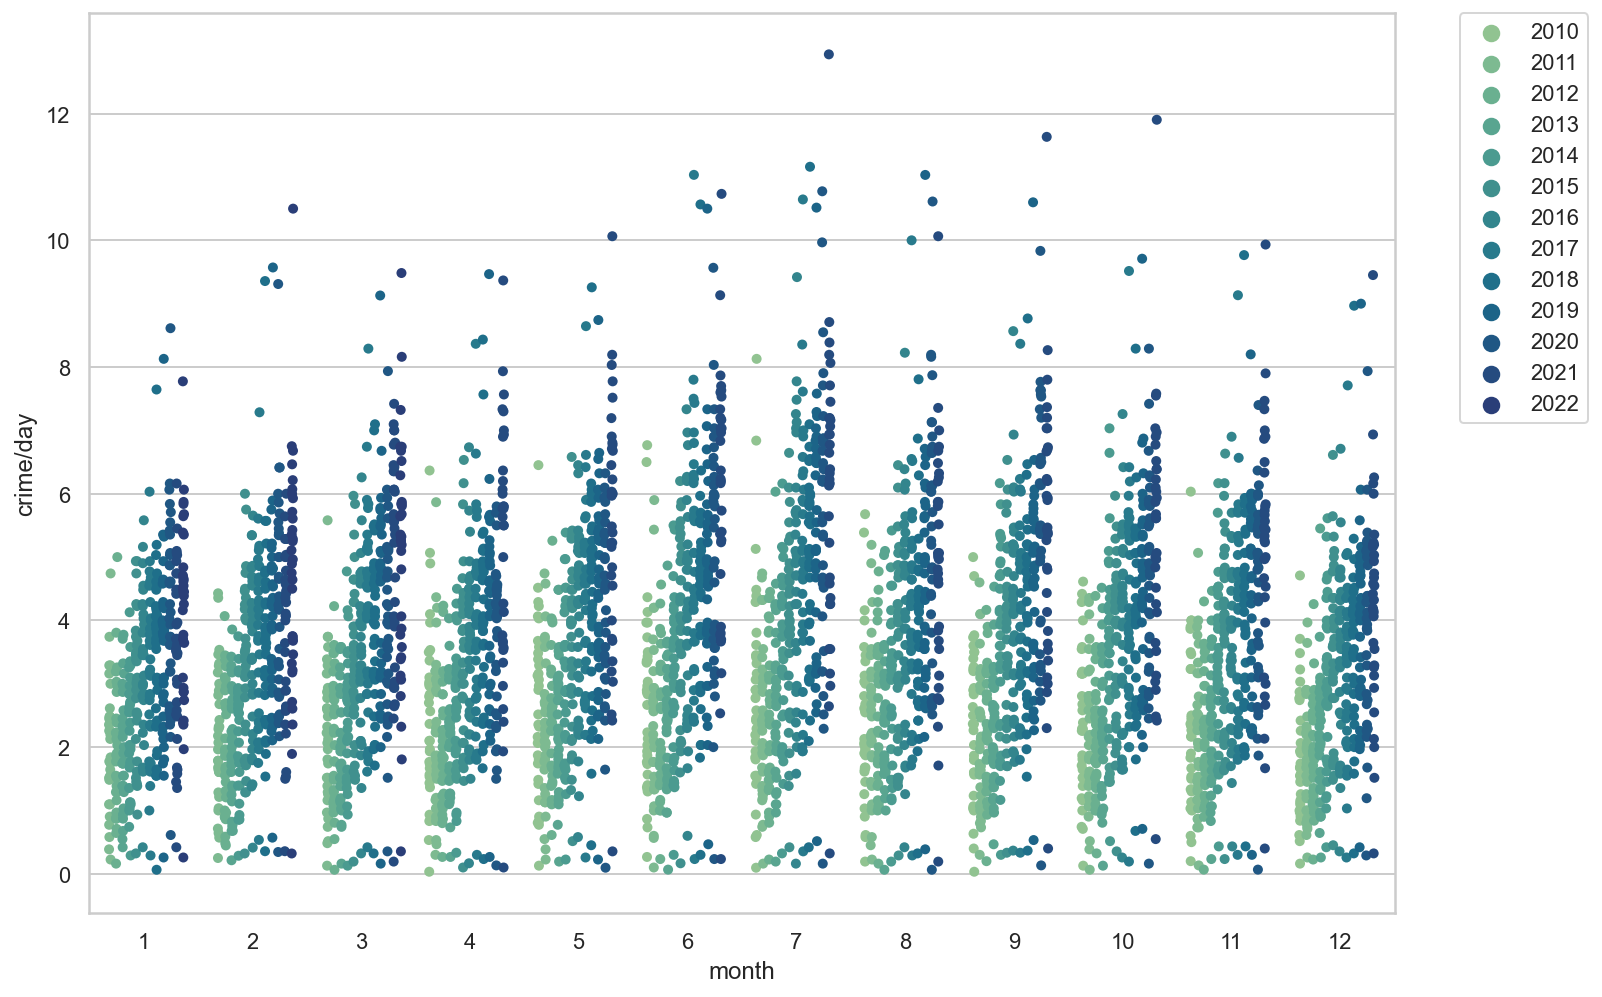

In [105]:
sns.set_theme(style="whitegrid")
sns.stripplot(data=sdf[sdf.MajorText == 'Public Order Offences'], hue='year', y='crime/day', x='month', palette="crest", dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("annual.PublicOrderOffences.png", dpi=300)

Plot the annual cycle for different boroughs with years as coloured lines

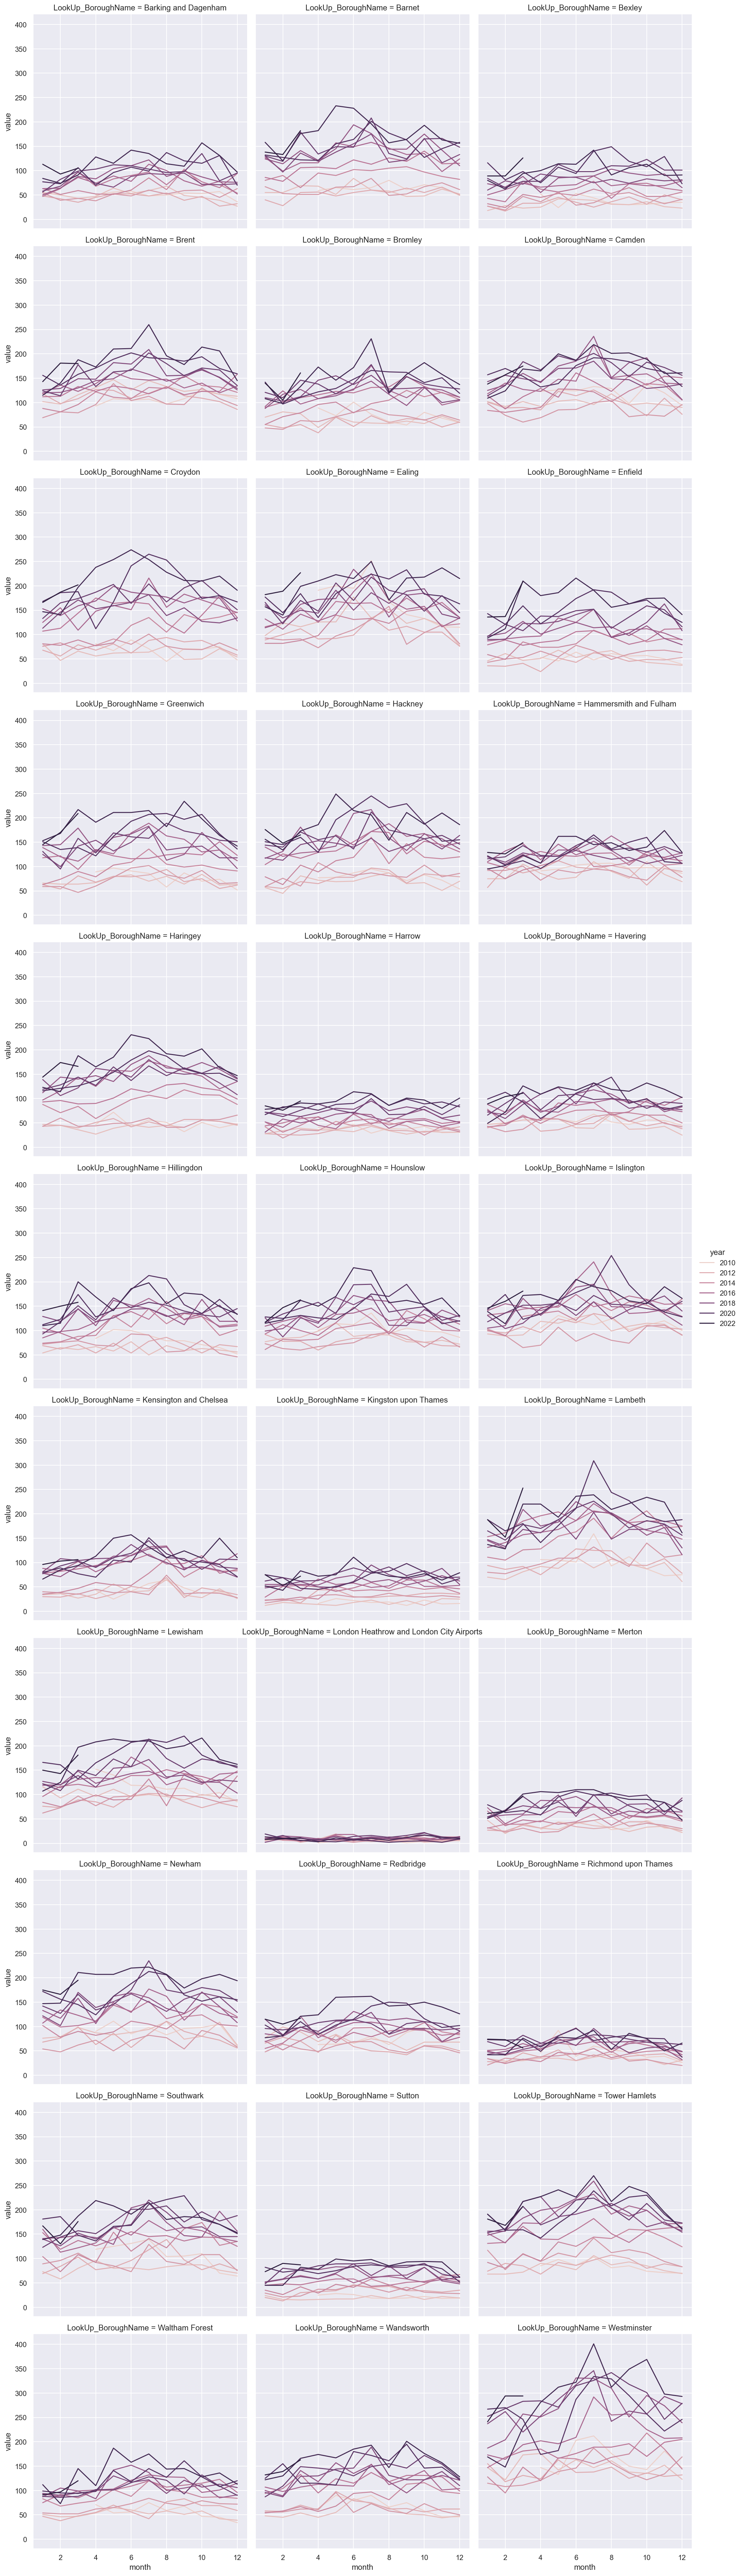

In [80]:
sns.relplot(
    data=sdf[sdf.MajorText == 'Public Order Offences'], x="month", y="value", hue="year",
    col="LookUp_BoroughName", col_wrap=3,
    kind="line"
)

Plot the year on year totals for each month with different boroughs in coloured lines:

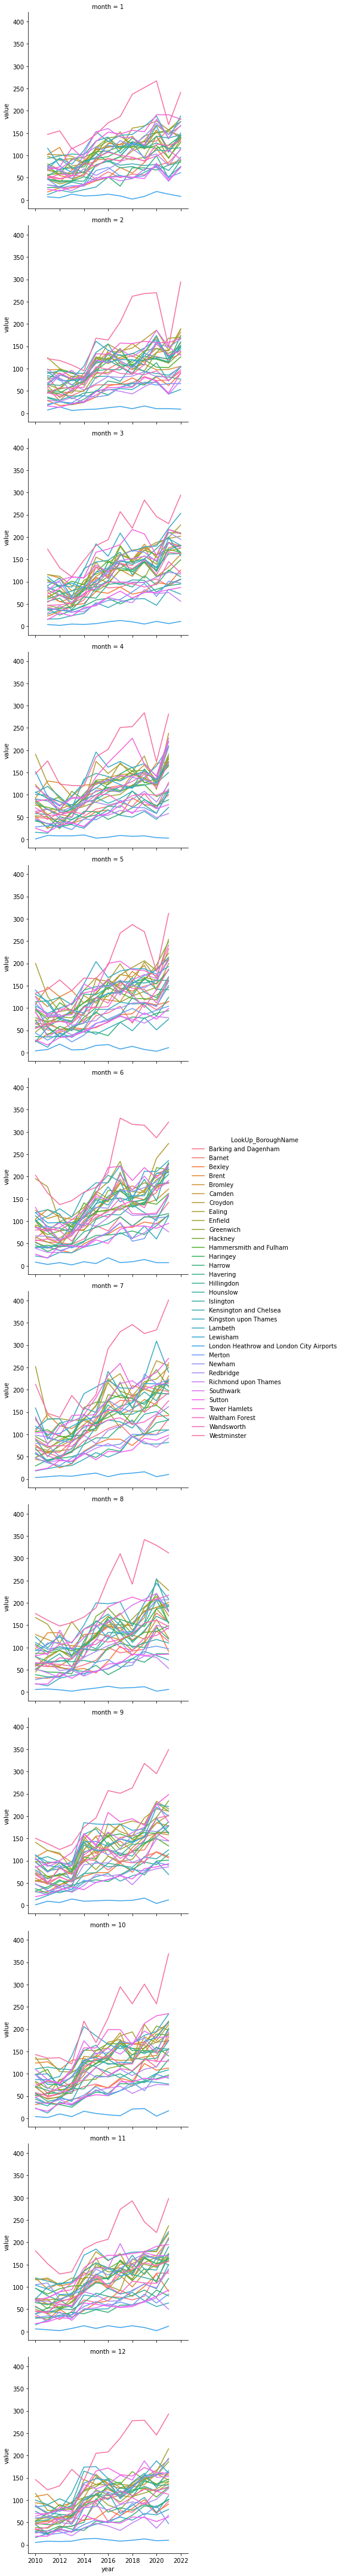

In [64]:
sns.relplot(
    data=sdf, x="year", y="value", hue="LookUp_BoroughName",
    row="month",
    kind="line"
)